env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


/usr/local/lib/python3.8/dist-packages/tqdm-4.65.0-py3.8.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


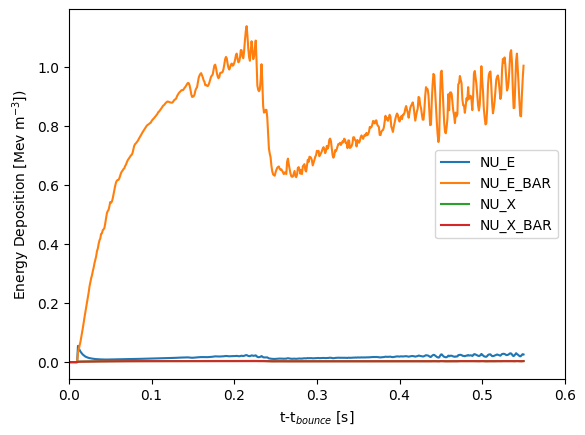

In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA
from asteria.simulation import Simulation
import astropy.units as u
import numpy as np

dt = 1*u.ms # highest frequency in Tamborra 2014 model

model = {'name': 'Tamborra_2014',
         'param':{
             'progenitor_mass': 27*u.Msun}
         }
sim = Simulation(model=model,
                 distance=10* u.kpc, 
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0*u.s, tmax=0.55*u.s, dt=dt,
                 geomscope = 'Gen2')
sim.run()

import matplotlib.pyplot as plt
for flavor in sim.flavors:
    plt.plot(sim.time, sim.E_per_V[flavor], label=flavor.name)
plt.legend()
ax = plt.gca()
ax.set(xlabel=r't-t$_{bounce}$ [s]', ylabel='Energy Deposition [Mev m$^{-3}$])', xlim=(0, 0.6));

In [2]:
mDOM_mask = np.logical_and(sim.detector.doms_table['om_type']=='md', sim.detector.doms_table['str']==1001)
DOM_mask = np.logical_and(sim.detector.doms_table['om_type']=='i3', sim.detector.doms_table['str']==1)

mDOM_eff = sim.detector.doms_table['effvol'][mDOM_mask]
DOM_eff = sim.detector.doms_table['effvol'][DOM_mask]

mDOM_z = sim.detector.doms_table['z'][mDOM_mask]
DOM_z = sim.detector.doms_table['z'][DOM_mask]

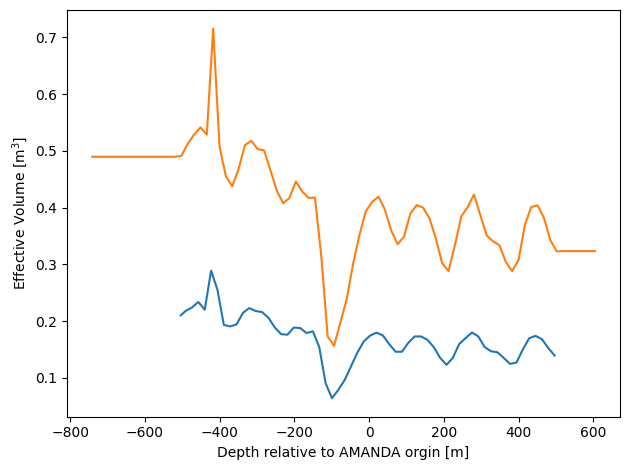

In [3]:
plt.plot(DOM_z, DOM_eff)
plt.plot(mDOM_z, mDOM_eff)
plt.xlabel('Depth relative to AMANDA orgin [m]')
plt.ylabel(r'Effective Volume [m$^3$]')
plt.tight_layout()

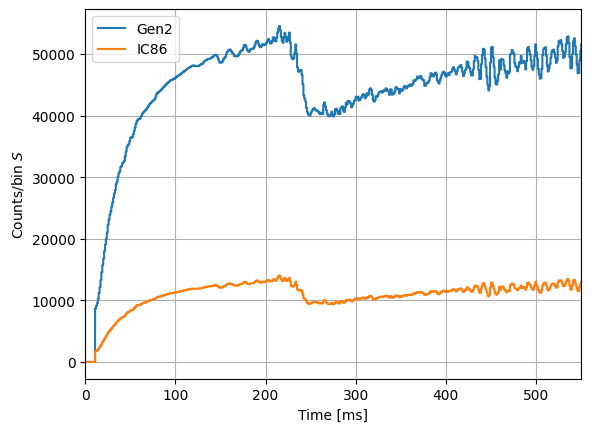

In [4]:
dt = 1*u.ms
sim.scale_result(distance=2*u.kpc)

t, i3_sig = sim.detector_signal(dt=dt, subdetector='i3')
t, dc_sig = sim.detector_signal(dt=dt, subdetector='dc')
t, md_sig = sim.detector_signal(dt=dt, subdetector='md')
t, comb_sig = sim.detector_signal(dt=dt)

t = t.to(u.ms)

sig_ic86 = i3_sig + dc_sig
sig_gen2 = comb_sig

fig, ax = plt.subplots(1,1)

ax.step(t, sig_gen2, where='post', label='Gen2')
ax.step(t, sig_ic86, where='post', label='IC86')
ax.set_ylabel(r"Counts/bin $S$")
ax.set_xlabel("Time [ms]")
ax.set_xlim(0,550)
ax.legend()
ax.grid()

In [5]:
data = np.array([sig_gen2, sig_ic86])
np.savetxt("./effvol_scaling.txt", data.T, delimiter = " ", newline = "\n")

In [11]:
data_scaling = np.genfromtxt("./effvol_scaling.txt", delimiter=" ", dtype=float)
data_table = np.genfromtxt("./effvol_table.txt", delimiter=" ", dtype=float)

/tmp/ipykernel_17530/3947849455.py:6: RuntimeWarning: invalid value encountered in divide
  ax.step(t, (sig_gen2_table/sig_gen2_scaling-1)*100, where='post', label='Gen2')
/tmp/ipykernel_17530/3947849455.py:7: RuntimeWarning: invalid value encountered in divide
  ax.step(t, (sig_ic86_table/sig_ic86_scaling-1)*100, where='post', label='IC86')


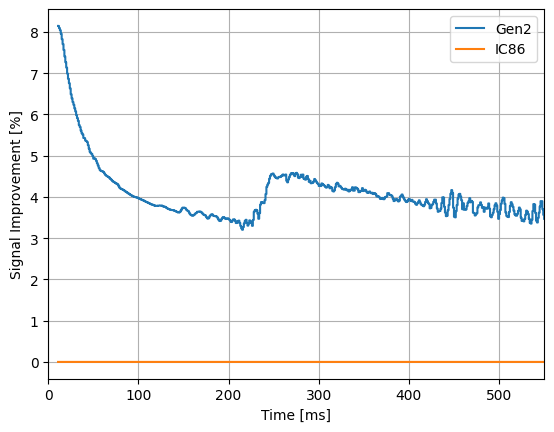

In [14]:
sig_gen2_scaling, sig_ic86_scaling = data_scaling.T
sig_gen2_table, sig_ic86_table = data_table.T

fig, ax = plt.subplots(1,1)

ax.step(t, (sig_gen2_table/sig_gen2_scaling-1)*100, where='post', label='Gen2')
ax.step(t, (sig_ic86_table/sig_ic86_scaling-1)*100, where='post', label='IC86')
ax.set_ylabel(r"Signal Improvement [%]")
ax.set_xlabel("Time [ms]")
ax.set_xlim(0,550)
ax.legend()
ax.grid()